In [1]:
import pandas as pd
from sklearn.datasets import load_digits
digits = load_digits()

digits.target

dir(digits)

digits.target_names

df = pd.DataFrame(digits.data,digits.target)
df.head()

df['target'] = digits.target
df.head(20)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('target',axis='columns'), df.target, test_size=0.3)

"""Using RBF kernel"""

from sklearn.svm import SVC
rbf_model = SVC(kernel='rbf')

len(X_train)

len(X_test)

rbf_model.fit(X_train, y_train)

rbf_model.score(X_test,y_test)

"""Using Linear kernel"""

linear_model = SVC(kernel='linear')
linear_model.fit(X_train,y_train)

linear_model.score(X_test,y_test)

0.9833333333333333

Column names: Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
Linear Kernel SVM Accuracy: 1.0
Linear Kernel Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
RBF Kernel SVM Accuracy: 1.0
RBF Kernel Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


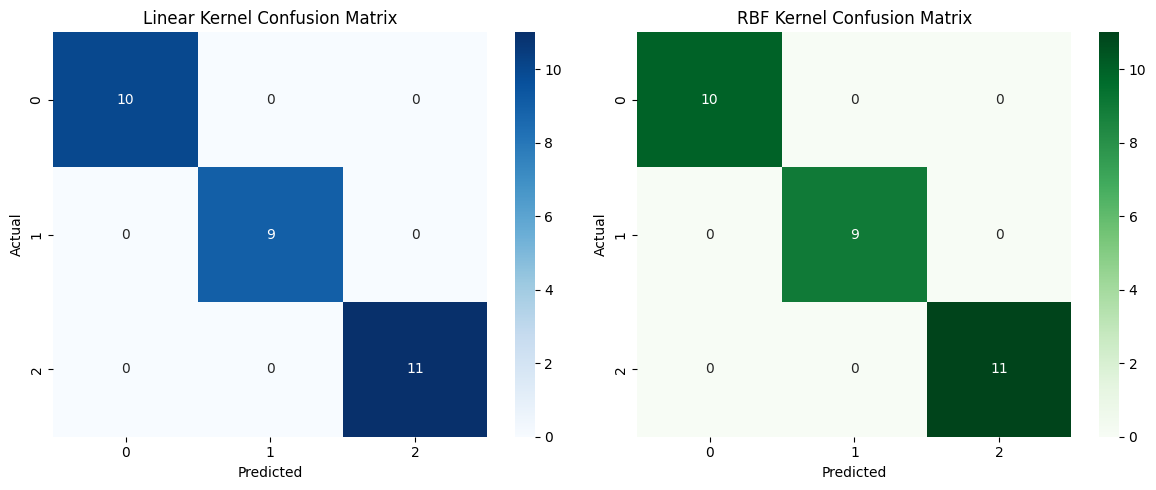

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('iris (3).csv')

# Display column names to identify features and labels
print("Column names:", df.columns)

# Assume last column is the target if not named 'species'
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Split the dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Kernel SVM
linear_svm = SVC(kernel='linear')
linear_svm.fit(X_train, y_train)
y_pred_linear = linear_svm.predict(X_test)
accuracy_linear = accuracy_score(y_test, y_pred_linear)
conf_matrix_linear = confusion_matrix(y_test, y_pred_linear)

print("Linear Kernel SVM Accuracy:", accuracy_linear)
print("Linear Kernel Confusion Matrix:\n", conf_matrix_linear)

# RBF Kernel SVM
rbf_svm = SVC(kernel='rbf')
rbf_svm.fit(X_train, y_train)
y_pred_rbf = rbf_svm.predict(X_test)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
conf_matrix_rbf = confusion_matrix(y_test, y_pred_rbf)

print("RBF Kernel SVM Accuracy:", accuracy_rbf)
print("RBF Kernel Confusion Matrix:\n", conf_matrix_rbf)

# Optional: visualize the confusion matrices
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(conf_matrix_linear, annot=True, fmt='d', cmap='Blues', ax=axs[0])
axs[0].set_title("Linear Kernel Confusion Matrix")
axs[0].set_xlabel("Predicted")
axs[0].set_ylabel("Actual")

sns.heatmap(conf_matrix_rbf, annot=True, fmt='d', cmap='Greens', ax=axs[1])
axs[1].set_title("RBF Kernel Confusion Matrix")
axs[1].set_xlabel("Predicted")
axs[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()

Accuracy: 0.9355
Confusion Matrix:
 [[147   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    1   0   1   0   0   0   0   0]
 [  0 138   0   3   1   0   0   0   0   0   0   0   0   1   0   0   0   4
    1   0   0   3   0   1   1   0]
 [  0   0 124   0   1   0   4   0   0   0   3   0   0   0   4   0   1   0
    0   0   0   0   0   0   0   0]
 [  0   0   0 153   0   0   0   1   0   0   0   0   0   2   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0   1   0 131   1   0   0   0   0   0   1   0   0   0   0   3   1
    0   1   0   0   0   1   0   1]
 [  0   0   0   0   0 131   1   0   2   0   0   0   0   0   0   2   0   0
    1   3   0   0   0   0   0   0]
 [  0   0   1   4   0   0 147   0   0   0   2   1   0   0   0   0   1   3
    0   0   0   1   0   0   0   0]
 [  0   2   1   7   0   0   1 107   0   0   5   0   0   3   4   0   0  10
    0   0   2   0   0   0   2   0]
 [  0   1   0   2   0   0   0   0 134   5   0   0   0   0   0   1   0   0
    1   0   0   0 

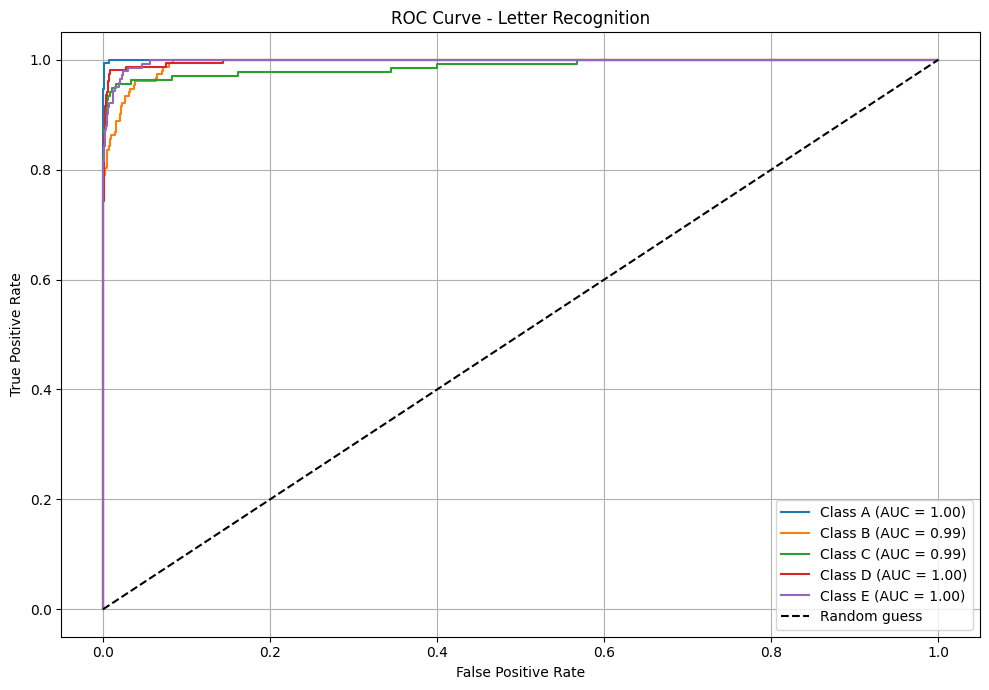

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import label_binarize, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Load dataset
df = pd.read_csv('letter-recognition.csv')

# First column is the label, the rest are features
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

# Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Binarize the labels for ROC curve (One-vs-Rest)
y_binarized = label_binarize(y_encoded, classes=np.unique(y_encoded))
n_classes = y_binarized.shape[1]

# Split data
X_train, X_test, y_train_bin, y_test_bin = train_test_split(X, y_binarized, test_size=0.2, random_state=42)
y_train_labels = np.argmax(y_train_bin, axis=1)
y_test_labels = np.argmax(y_test_bin, axis=1)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train One-vs-Rest SVM with RBF kernel
classifier = OneVsRestClassifier(SVC(kernel='rbf', probability=True, random_state=42))
classifier.fit(X_train, y_train_bin)

# Predict and evaluate
y_score = classifier.decision_function(X_test)
y_pred_labels = np.argmax(y_score, axis=1)

# Accuracy and confusion matrix
accuracy = accuracy_score(y_test_labels, y_pred_labels)
conf_matrix = confusion_matrix(y_test_labels, y_pred_labels)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for a few selected classes for clarity
plt.figure(figsize=(10, 7))
for i in range(min(n_classes, 5)):  # Plot only first 5 classes for readability
    plt.plot(fpr[i], tpr[i], label=f'Class {le.inverse_transform([i])[0]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Letter Recognition')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()
